In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
y = np.load('/content/drive/MyDrive/hw1/y.npy')
x = np.load('/content/drive/MyDrive/hw1/x.npy')
print(x)
print(y)

[[-2.28087808  1.40445145 -0.99437421 ... -1.36477942 -1.37765935
   1.00076637]
 [ 0.53550748  0.61497875  0.04821114 ... -1.09934053  0.18752709
  -0.25752972]
 [-0.86842676  0.26010107  1.05977427 ...  0.4643568  -0.50460435
   0.48626646]
 ...
 [-0.76477821 -1.45608311  1.01865437 ... -0.02316979 -0.44090869
  -1.53729138]
 [-0.28829529 -0.57045743 -1.05593108 ...  1.008429    1.38152953
   0.02168242]
 [ 1.54301713  1.34746804 -1.06544863 ...  0.41867174 -3.51290644
   0.10420939]]
[1 0 0 ... 3 0 2]


In [ ]:
D_Tree = DecisionTreeClassifier()


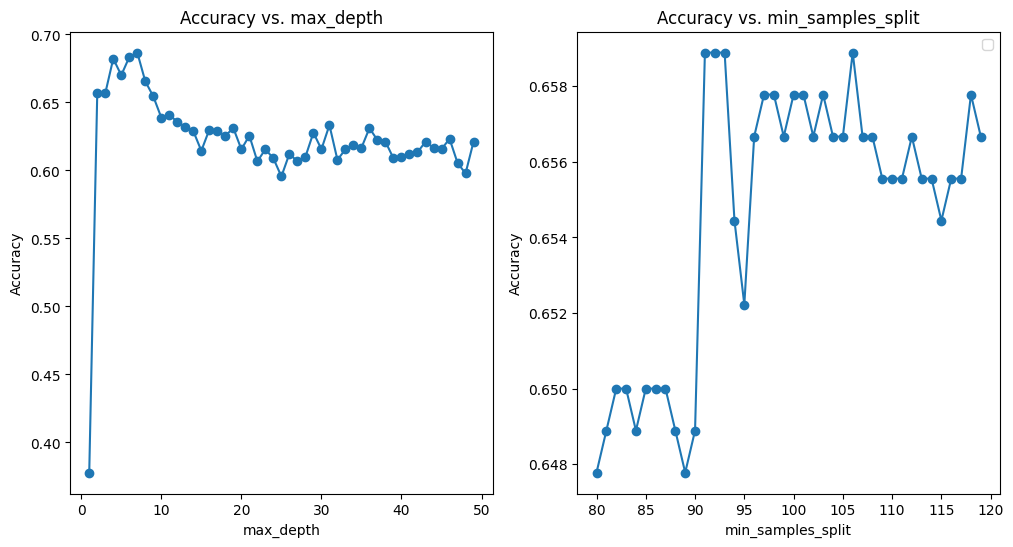

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

depthes = range(1,50)
depthes_acc = []
max_acc_depth = 0

min_samples_split = range(80,120)
min_samples_split_acc = []
max_acc_split = 0


for i in depthes:
  D_Tree=DecisionTreeClassifier(max_depth=i)
  D_Tree.fit(x_train, y_train)
  accuracy = D_Tree.score(x_test,y_test)
  depthes_acc.append(accuracy)

for i in min_samples_split:
  D_Tree=DecisionTreeClassifier(min_samples_split=i)
  D_Tree.fit(x_train, y_train)
  accuracy = D_Tree.score(x_test,y_test)
  min_samples_split_acc.append(accuracy)


max_acc_depth = max(depthes_acc)
max_acc_split = max(min_samples_split_acc)



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(depthes, depthes_acc, marker='o')
plt.title('Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(min_samples_split, min_samples_split_acc,  marker='o')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')




plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = DecisionTreeClassifier(),
X = x,
y = y, train_sizes = [.25, .5, .75, 1], cv = 5,
scoring = 'accuracy')

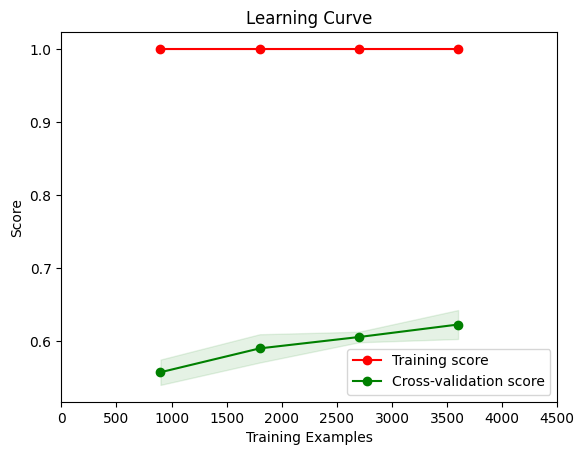

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)
test_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training set scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot cross-validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add legend and display plot
plt.legend(loc="best")
plt.xlim(0, 4500)
plt.show()
